### 이상치
- 상식적인 범위를 벗어나는 데이터 값을 뜻하고
- 이상치는 통계적인 방법과 도메인 지식을 이용해서 판단한다.

In [24]:
import pandas as pd

In [5]:
mpg =pd.read_csv('mpg.csv')

NameError: name 'pd' is not defined

#### 이상치를 제거할 때 가장 많이 사용하는 시각화 그래프
- boxplot (상자그림)

In [8]:
import seaborn as sns

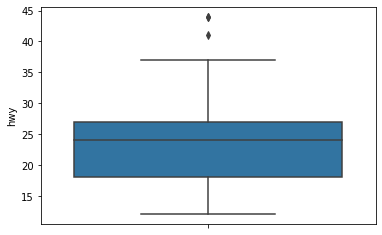

In [9]:
sns.boxplot(data=mpg, y='hwy')

- 상자 아래 세로선 , 아랫수염 , 하위0%~25% 내에 해당하는 값

- 상자 밑면 1사분위수(Q1), 하위 25% 위치 값

- 상자내 굵은 선 2사분위수(Q2), 하위 50% 위치 값( 중앙 값)

- 상자 윗면, 3사분위수(Q3), 하위 75%위치 값

- 상자 위 세로선, 윗수염, 하위 75%~100% 내에 해당하는 값

- 상자 밖 가로선 극단치 경계(이상치 경계) - Q1, Q3밖 1.5IQR내 최대값

- 상자 밖 점 표식 극단치(이상치), Q1, Q3밖 1.5IQR를 벗어난 값

### 1사분위수, 3사분위수 값

- quantile() 분위수를 구할 수 있음 
- 1사분위수는 하위 25%, 3사분위수는 하위 75% 값

In [10]:
qut25 = mpg['hwy'].quantile(.25)

In [12]:
qut75 = mpg['hwy'].quantile(.75)

### IQR 구하기

- 1사분위수와 3사분위수의 거리를 IQR(Inter Quantile range, 사분위 범위)

In [14]:
iqr = qut75-qut25

In [15]:
iqr

9.0

### 상한, 하한 구하는 법
극단치의 경계가 되는 하한, 상한

- 하한 : 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값
- 상한 : 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값

In [17]:
qut25 -1.5*iqr #하한

4.5

In [18]:
qut75 + 1.5*iqr#상한

40.5

### 극단치를 결측 처리하기!

In [19]:
import numpy as np

In [20]:
mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),np.nan, mpg['hwy'])

In [22]:
mpg['hwy'].isna().sum() #이상치가 3개가 나온 것을 확인할 수 있다.

3

In [26]:
##결측치 제거안 하고
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [23]:
##결측치 제거하고 분석
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 데이터를 추출하는 법
- 판다스에서 제공하는 다양한 메서드를 직접 확인하기!

In [28]:
#컬럼, 열의 기준으로 데이터를 추출하는 경우는

mpg['manufacturer'] #컬럼을 기준으로 추출

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [83]:
mpg[['manufacturer','drv']]

,manufacturer,drv
0,audi,f
1,audi,f
2,audi,f
3,audi,f
4,audi,f
...,...,...
229,volkswagen,f
230,volkswagen,f
231,volkswagen,f
232,volkswagen,f


## 행 단위로 데이터를 추출하는 경우!

- loc : 인덱스를 기준으로 행 데이터를 추출
- iloc : 행 번호를 기준으로 데이터를 추출

In [31]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [40]:
#변수를 대입할 수 있다.
mpg_rows = mpg.shape[0]

In [42]:
mpg_rows_1 = mpg_rows-1
print(mpg_rows_1)

233


In [43]:
mpg.loc[mpg_rows_1]

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                     26
fl                       p
category           midsize
Name: 233, dtype: object

In [39]:
mpg.loc[[0,4,233,12,41]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan


### iloc의 속성
- loc은 데이터프레임의 인덱스를 사용하여 데이터를 추출!
- iloc은! 데이터의 순서를 의미하는 행 번호를 사용하여 데이터를 추출한다.

In [45]:
print(mpg.loc[233])
print(mpg.iloc[233])

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                     26
fl                       p
category           midsize
Name: 233, dtype: object
manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                     26
fl                       p
category           midsize
Name: 233, dtype: object


In [47]:
#iloc 동일하게 loc과 같다.
mpg.iloc[-1] 

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                     26
fl                       p
category           midsize
Name: 233, dtype: object

In [49]:
y = range(10)

In [48]:
mpg.iloc[[1,2,3,4,5,6,7]] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [50]:
mpg.iloc[y] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [53]:
mpg_new =mpg.loc[[0,2,4,6,8]]

In [86]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [90]:
mpg_new.loc[2]

manufacturer          audi
model                   a4
displ                    2
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object

In [89]:
mpg_new.iloc[2]

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [61]:
mpg_new.iloc[5] 

IndexError: single positional indexer is out-of-bounds

### loc, iloc 자유자재로 다뤄보기!

In [62]:
mpg.loc[:,['model','cty']] #슬라이싱이 가능하다.

,model,cty
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16
...,...,...
229,passat,19
230,passat,21
231,passat,16
232,passat,18


In [65]:
mpg.loc[1:100,['model','cty']]

,model,cty
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
...,...,...
96,mustang,15
97,mustang,15
98,mustang,14
99,civic,28


In [64]:
mpg.loc[1:10,[1,2,3]] #loc은 컬럼에 대해서 명칭을 적어줘야 한다. 

KeyError: "None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"

In [66]:
mpg.iloc[1:10,[1,2,3]] #컬럼의 이름뿐만 아니라 컬럼의 순서를 적어도 추출할 수 있다.

,model,displ,year
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999
5,a4,2.8,1999
6,a4,3.1,2008
7,a4 quattro,1.8,1999
8,a4 quattro,1.8,1999
9,a4 quattro,2.0,2008


In [68]:
small_range = list(range(7))

In [72]:
sm_range = list(range(0,10,2))

In [69]:
small_range

[0, 1, 2, 3, 4, 5, 6]

In [73]:
mpg.iloc[:, sm_range]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29
1,audi,1.8,4,f,29
2,audi,2.0,4,f,31
3,audi,2.0,4,f,30
4,audi,2.8,6,f,26
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28
230,volkswagen,2.0,4,f,29
231,volkswagen,2.8,6,f,26
232,volkswagen,2.8,6,f,26


### 슬라이싱 복습

In [74]:
mpg.iloc[:,:2]

,manufacturer,model
0,audi,a4
1,audi,a4
2,audi,a4
3,audi,a4
4,audi,a4
...,...,...
229,volkswagen,passat
230,volkswagen,passat
231,volkswagen,passat
232,volkswagen,passat


In [82]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [75]:
mpg.iloc[:,0:8:2] #0~7까지의 컬럼 순서에 2씩 증가를 하니 0,2,4,6에 대한 컬럼 값을 추출하는 것!

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
...,...,...,...,...
229,volkswagen,2.0,4,f
230,volkswagen,2.0,4,f
231,volkswagen,2.8,6,f
232,volkswagen,2.8,6,f


In [76]:
mpg.iloc[[1,2,3,4,5],[2,3,4,5]]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


In [78]:
mpg.loc[[1,2,3,4,5],['displ','year','cyl','trans']]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


### 과제1. mpg 데이터 기준으로 
loc, iloc으로 데이터를 추출하기

슬라이싱, 변수에 넣기 등을 최소 5개 이상씩 진행해 주세요!
### 과제 2. mpg 데이터의 이상치를 다른 컬럼도 다 살펴봐 주세요!
- 이상치를 살펴본 후 IQR을 계산해서 이상치를 제거해 주세요!